# JCC2 Application-Section Rating Matrix

This notebook creates comprehensive tables and visualizations showing application ratings across different JCC2 sections.

**Legend:**
- **x**: Application is not applicable to this section
- **\***: Application is applicable but no data available
- **Number**: Average rating score (1-6 scale)
- **N/A**: User indicated "Not Applicable" for this question

In [1]:
import sys
import os

# Add the parent directory to the path
sys.path.insert(0, os.path.abspath('..'))

# Import the processor module
from jcc2_data_processor import create_processor

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Define consistent color scheme
COLORS = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e',
    'tertiary': '#9467bd',
    'success': '#2ca02c',
    'danger': '#d62728',
    'warning': '#ff9800',
    'info': '#17a2b8',
    'gray': '#7f7f7f'
}

In [3]:
# Load data
data_file = '/home/nathanjgaul/Downloads/DCDC UQ Combined_2025-07-30_pii_scrubbed.csv'

# Initialize processor
processor = create_processor(data_file)

# Load data
df = processor.load_data()

print(f"Data loaded: {len(df)} responses, {len(df.columns)} fields")
print(f"Date range: {df['user_information.date'].min()} to {df['user_information.date'].max()}")

2025-08-03 09:53:38,934 - INFO - Detected User Questionnaire format
2025-08-03 09:53:38,935 - INFO - Loading data from /home/nathanjgaul/Downloads/DCDC UQ Combined_2025-07-30_pii_scrubbed.csv
2025-08-03 09:53:38,946 - INFO - Parsing field schemas
2025-08-03 09:53:38,951 - INFO - Loaded 21 data rows with 667 columns
2025-08-03 09:53:38,951 - INFO - Found 28 sections and 6 system columns


Data loaded: 21 responses, 667 fields
Date range: 2025-06-23 to 2025-06-25


In [20]:
# Define the target sections as requested
target_sections = [
    'mop_1_1_1',
    'mos_1_1_2',
    'mop_1_1_3',
    'reporting_and_data_export',
    'mop_1_1_5',
    'mop_1_2_1',
    'mop_1_2_2',
    'mos_1_3_1',
    'mop_1_3_2',
    'mop_1_3_3',
    'mop_1_3_4',
    'mop_1_3_5',
    'mop_2_1_1',
    'mop_2_1_2',
    'mop_2_1_7',
    'mop_2_1_9',
    'mop_2_3_1',
    'mop_2_3_2',
    'mop_2_4_1',
    'mos_3_2_1',
    'mos_3_2_2',
    'mop_3_2_3'
]

# Define all applications - include variations that might appear in field names
all_applications = [
    'a2it', 'cad', 'codex', 'crucible', 'cyber9line', 'dispatch',
    'jcc2cyberops', 'jcc2readiness', 'madss', 'rally', 'redmap',
    'sigact', 'threathub', 'triage', 'unity'
]

# Also check for variations
app_variations = {
    'cyber9line': ['cyber9line', 'cyber_9line', 'cyber-9line'],
    'jcc2cyberops': ['jcc2cyberops', 'jcc2_cyberops', 'jcc2-cyberops'],
    'jcc2readiness': ['jcc2readiness', 'jcc2_readiness', 'jcc2-readiness', 'readiness'],
    'threathub': ['threathub', 'threat_hub', 'threat-hub']
}

# Create a reverse mapping from variation to canonical app name
variation_to_app = {}
for canonical_app, variations in app_variations.items():
    for variation in variations:
        variation_to_app[variation] = canonical_app

# Add standard apps that don't have variations
for app in all_applications:
    if app not in app_variations:
        variation_to_app[app] = app

# Create a comprehensive list of all possible app identifiers to check
all_app_identifiers = list(variation_to_app.keys())

# Display names for applications (proper formatting)
app_display_names = {
    'a2it': 'A2IT',
    'cad': 'CAD',
    'codex': 'Codex',
    'crucible': 'Crucible',
    'cyber9line': 'Cyber 9-Line',
    'dispatch': 'Dispatch',
    'jcc2cyberops': 'JCC2 Cyber Ops',
    'jcc2readiness': 'JCC2 Readiness',
    'madss': 'MADSS',
    'rally': 'Rally',
    'redmap': 'REDMAP',
    'sigact': 'SigAct',
    'threathub': 'Threat Hub',
    'triage': 'Triage',
    'unity': 'Unity'
}

# Display names for sections
section_display_names = {
    'mop_1_1_1': 'MOP 1.1.1',
    'mos_1_1_2': 'MOS 1.1.2',
    'mop_1_1_3': 'MOP 1.1.3',
    'reporting_and_data_export': 'Reporting & Export',
    'mop_1_1_5': 'MOP 1.1.5',
    'mop_1_2_1': 'MOP 1.2.1',
    'mop_1_2_2': 'MOP 1.2.2',
    'mos_1_3_1': 'MOS 1.3.1',
    'mop_1_3_2': 'MOP 1.3.2',
    'mop_1_3_3': 'MOP 1.3.3',
    'mop_1_3_4': 'MOP 1.3.4',
    'mop_1_3_5': 'MOP 1.3.5',
    'mop_2_1_1': 'MOP 2.1.1',
    'mop_2_1_2': 'MOP 2.1.2',
    'mop_2_1_7': 'MOP 2.1.7',
    'mop_2_1_9': 'MOP 2.1.9',
    'mop_2_3_1': 'MOP 2.3.1',
    'mop_2_3_2': 'MOP 2.3.2',
    'mop_2_4_1': 'MOP 2.4.1',
    'mos_3_2_1': 'MOS 3.2.1',
    'mos_3_2_2': 'MOS 3.2.2',
    'mop_3_2_3': 'MOP 3.2.3'
}

In [5]:
# from math import isnan

# def is_nan_value(x):
#     """Check if a value is any type of NaN"""
#     try:
#         return isnan(x)
#     except (TypeError, ValueError):
#         return False

# def normalize_list(lst):
#     """Replace any NaN value with a placeholder"""
#     return ['__NaN__' if is_nan_value(x) else x for x in lst]

def normalize_for_comparison(lst):
    """Convert list to set, treating all NaN types as equivalent"""
    result = set()
    for item in lst:
        if pd.isna(item):
            result.add('__NaN__')
        else:
            result.add(item)
    return result

rating_values = [
    'Completely Ineffective',
    'Moderately Ineffective',
    'Slightly Ineffective',
    'Slightly Effective',
    'Moderately Effective',
    'Completely Effective',
    'Not Applicable',
    float('nan'),
    np.nan
]

normalized_rating_set = normalize_for_comparison(rating_values)

In [22]:
def get_app_from_field(field_name, section_prefix=""):
    """
    Extract app name from field, checking for various patterns and variations
    """
    # Remove section prefix if provided
    if section_prefix and field_name.startswith(section_prefix):
        field_without_section = field_name[len(section_prefix) :].lstrip(".")
    else:
        field_without_section = field_name

    # Check all apps and their variations
    for canonical_app in all_applications:
        # Get variations for this app (or just the app itself if no variations)
        variations = app_variations.get(canonical_app, [canonical_app])

        for variation in variations:
            # Check multiple patterns:
            # 1. Field ends with variation
            # 2. Field ends with _variation
            # 3. Field ends with -variation
            if (
                field_without_section.endswith(variation)
                or field_without_section.endswith(f"_{variation}")
                or field_without_section.endswith(f"-{variation}")
            ):
                return canonical_app

    return None

In [23]:
# Analyze which fields exist for each section to understand applicability
section_field_analysis = {}

# Important: The data structure appears to be that each section has questions about
# different aspects (e.g., "intelligence_data_provided") that are asked for each app
# The pattern is: section.question_topic_appname

for section in target_sections:
    if section in processor.sections:
        fields = processor.sections[section]
        field_analysis = {
            "total_fields": len(fields),
            "app_specific_fields": {},
            "overall_fields": [],
        }

        # First, let's identify all rating fields
        rating_fields = [
            field
            for field in fields
            if not df[field].apply(lambda x: isinstance(x, list)).any()
            and not normalize_for_comparison(df[field].unique()) - normalized_rating_set
        ]
        print(f"\n{section}: Found {len(rating_fields)} rating fields")

        for field in rating_fields:
            app_found = False
            field_lower = field.lower()
            
            # Remove section prefix to analyze the field name
            field_without_section = field.replace(f"{section}.", "")

            # Check each application
            # # The pattern appears to be that app names come at the END of the field name
            # for app in all_applications:
            #     # Check if the field ends with the app name
            #     if field_without_section.endswith(
            #         app
            #     ) or field_without_section.endswith(f"_{app}"):
            #         if app not in field_analysis["app_specific_fields"]:
            #             field_analysis["app_specific_fields"][app] = []
            #         field_analysis["app_specific_fields"][app].append(field)
            #         app_found = True
            #         break
            # Check for app-specific field
            detected_app = get_app_from_field(field, section_prefix=f"{section}")
            if detected_app:
                if detected_app not in field_analysis["app_specific_fields"]:
                    field_analysis["app_specific_fields"][detected_app] = []
                field_analysis["app_specific_fields"][detected_app].append(field)
                app_found = True

            # If not app-specific, it's likely an overall field
            if not app_found:
                # Fields with 'overall' in them are definitely overall fields
                if "overall" in field_lower:
                    field_analysis["overall_fields"].append(field)
                else:
                    # If it has effectiveness/suitability but no app name, it's also overall
                    field_analysis["overall_fields"].append(field)

        section_field_analysis[section] = field_analysis

# Display the analysis
print("\n\nSection Field Analysis:")
print("=" * 80)
for section, analysis in section_field_analysis.items():
    print(f"\n{section_display_names.get(section, section)}:")
    print(f"  Total fields: {analysis['total_fields']}")
    print(
        f"  Overall effectiveness/suitability fields: {len(analysis['overall_fields'])}"
    )
    
    # Calculate app-specific field count
    app_specific_count = sum(len(fields) for fields in analysis["app_specific_fields"].values())
    total_categorized = len(analysis['overall_fields']) + app_specific_count
    
    # Check if counts add up and highlight discrepancies
    if total_categorized != analysis['total_fields']:
        print(f"  ⚠️  WARNING: Field count mismatch!")
        print(f"      Overall fields: {len(analysis['overall_fields'])}")
        print(f"      App-specific fields: {app_specific_count}")
        print(f"      Sum: {total_categorized}")
        print(f"      Total fields: {analysis['total_fields']}")
        print(f"      Missing/Uncategorized: {analysis['total_fields'] - total_categorized}")
    
    if analysis["overall_fields"]:
        print(f"  Overall fields examples:")
        for field in analysis["overall_fields"][:3]:
            print(f"    - {field}")
    if analysis["app_specific_fields"]:
        print(f"  App-specific fields:")
        for app, fields in analysis["app_specific_fields"].items():
            print(f"    - {app_display_names.get(app, app)}: {len(fields)} fields")
            # Show first field as example
            # if fields:
            #     print(f"      Example: {fields[0]}")


mop_1_1_1: Found 31 rating fields

mos_1_1_2: Found 9 rating fields

mop_1_1_3: Found 6 rating fields

reporting_and_data_export: Found 106 rating fields

mop_1_1_5: Found 16 rating fields

mop_1_2_1: Found 25 rating fields

mop_1_2_2: Found 5 rating fields

mos_1_3_1: Found 106 rating fields

mop_1_3_2: Found 4 rating fields

mop_1_3_3: Found 16 rating fields

mop_1_3_4: Found 61 rating fields

mop_1_3_5: Found 1 rating fields

mop_2_1_1: Found 6 rating fields

mop_2_1_2: Found 7 rating fields

mop_2_1_7: Found 2 rating fields

mop_2_1_9: Found 6 rating fields

mop_2_3_1: Found 6 rating fields

mop_2_3_2: Found 1 rating fields

mop_2_4_1: Found 2 rating fields

mos_3_2_1: Found 15 rating fields

mos_3_2_2: Found 17 rating fields

mop_3_2_3: Found 61 rating fields


Section Field Analysis:

MOP 1.1.1:
  Total fields: 31
  Overall effectiveness/suitability fields: 1
  Overall fields examples:
    - mop_1_1_1.intelligence_data_overall_effectiveness
  App-specific fields:
    - JCC2 Cybe

In [24]:
# Define rating mappings
rating_map = {
    'Completely Ineffective': 1,
    'Moderately Ineffective': 2,
    'Slightly Ineffective': 3,
    'Slightly Effective': 4,
    'Moderately Effective': 5,
    'Completely Effective': 6
}

# suitability_map = {
#     'Completely Unsuitable': 1,
#     'Unsuitable': 2,
#     'Somewhat Unsuitable': 3,
#     'Somewhat Suitable': 4,
#     'Suitable': 5,
#     'Completely Suitable': 6
# }

# Function to calculate average rating for a field
def calculate_field_rating(field_name, df):
    if field_name not in df.columns:
        return None, 0, 0
    
    # Determine which mapping to use
    # mapping = effectiveness_map if 'effectiveness' in field_name else suitability_map
    mapping = rating_map
    print(field_name)
    # Get all values
    values = df[field_name]
    print(values)
    # Count N/A responses
    na_count = (values == 'NA').sum() + (values == 'N/A').sum() + (values == 'Not Applicable').sum()
    print(f"  NA Count: {na_count}")
    # Get valid ratings (not null and not N/A)
    valid_mask = values.notna() & ~values.isin(['NA', 'N/A', 'Not Applicable'])
    valid_values = values[valid_mask]
    
    if len(valid_values) == 0:
        return None, na_count, len(values) - values.isna().sum()
    
    # Map to numeric values
    numeric_values = valid_values.map(mapping).dropna()
    
    if len(numeric_values) == 0:
        return None, na_count, len(values) - values.isna().sum()
    
    return numeric_values.mean(), na_count, len(values) - values.isna().sum()

In [28]:
# Create the rating matrix
# Rows: Applications + JCC2 Overall
# Columns: Sections

matrix_data = []
row_labels = []

# Process each application
for app in all_applications:
    row_data = []
    row_labels.append(app_display_names.get(app, app))
    print(f"Application: {app}")
    
    for section in target_sections:
        if section not in section_field_analysis:
            row_data.append('x')  # Section doesn't exist
            continue
        print(f"  Section: {section}")

        # Check if this app has fields in this section
        app_fields = section_field_analysis[section]['app_specific_fields'].get(app, [])
        print(f"  App Fields: {app_fields}")
        if not app_fields:
            # App not applicable to this section
            row_data.append('x')
        else:
            # Calculate average rating for all app-specific fields
            ratings = []
            total_responses = 0
            na_responses = 0
            
            for field in app_fields:
                # if 'effectiveness' in field or 'suitability' in field or 'effective' in field or 'suitable' in field:
                    rating, na_count, total_count = calculate_field_rating(field, df)
                    if rating is not None:
                        ratings.append(rating)
                    total_responses += total_count
                    na_responses += na_count
            
            if ratings:
                avg_rating = np.mean(ratings)
                row_data.append(f"{avg_rating:.1f}")
            elif na_responses > 0 and na_responses == total_responses:
                row_data.append('N/A')  # All responses were N/A
            else:
                row_data.append('*')  # No data available
    
    matrix_data.append(row_data)

# Add JCC2 Overall row
overall_row = []
row_labels.append('JCC2 Overall')

for section in target_sections:
    if section not in section_field_analysis:
        overall_row.append('x')
        continue
    
    # Get overall fields for this section
    overall_fields = section_field_analysis[section]['overall_fields']
    
    if not overall_fields:
        overall_row.append('x')
    else:
        ratings = []
        total_responses = 0
        na_responses = 0
        
        for field in overall_fields:
            rating, na_count, total_count = calculate_field_rating(field, df)
            if rating is not None:
                ratings.append(rating)
            total_responses += total_count
            na_responses += na_count
        
        if ratings:
            avg_rating = np.mean(ratings)
            overall_row.append(f"{avg_rating:.1f}")
        elif na_responses > 0 and na_responses == total_responses:
            overall_row.append('N/A')
        else:
            overall_row.append('*')

matrix_data.append(overall_row)

# Create DataFrame
column_labels = [section_display_names.get(s, s) for s in target_sections]
matrix_df = pd.DataFrame(matrix_data, index=row_labels, columns=column_labels)

print("\nApplication-Section Rating Matrix:")
print("=" * 120)
print(matrix_df)

Application: a2it
  Section: mop_1_1_1
  App Fields: ['mop_1_1_1.intelligence_data_provided_a2it', 'mop_1_1_1.intelligence_data_completion_of_role_a2it']
mop_1_1_1.intelligence_data_provided_a2it
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5     Moderately Effective
6                      NaN
7                      NaN
8           Not Applicable
9                      NaN
10                     NaN
11          Not Applicable
12                     NaN
13                     NaN
14                     NaN
15                     NaN
16    Moderately Effective
17    Moderately Effective
18      Slightly Effective
19                     NaN
20                     NaN
21                     NaN
Name: mop_1_1_1.intelligence_data_provided_a2it, dtype: object
  NA Count: 2
mop_1_1_1.intelligence_data_completion_of_role_a2it
1                      NaN
2                      NaN
3                      NaN
4                      NaN


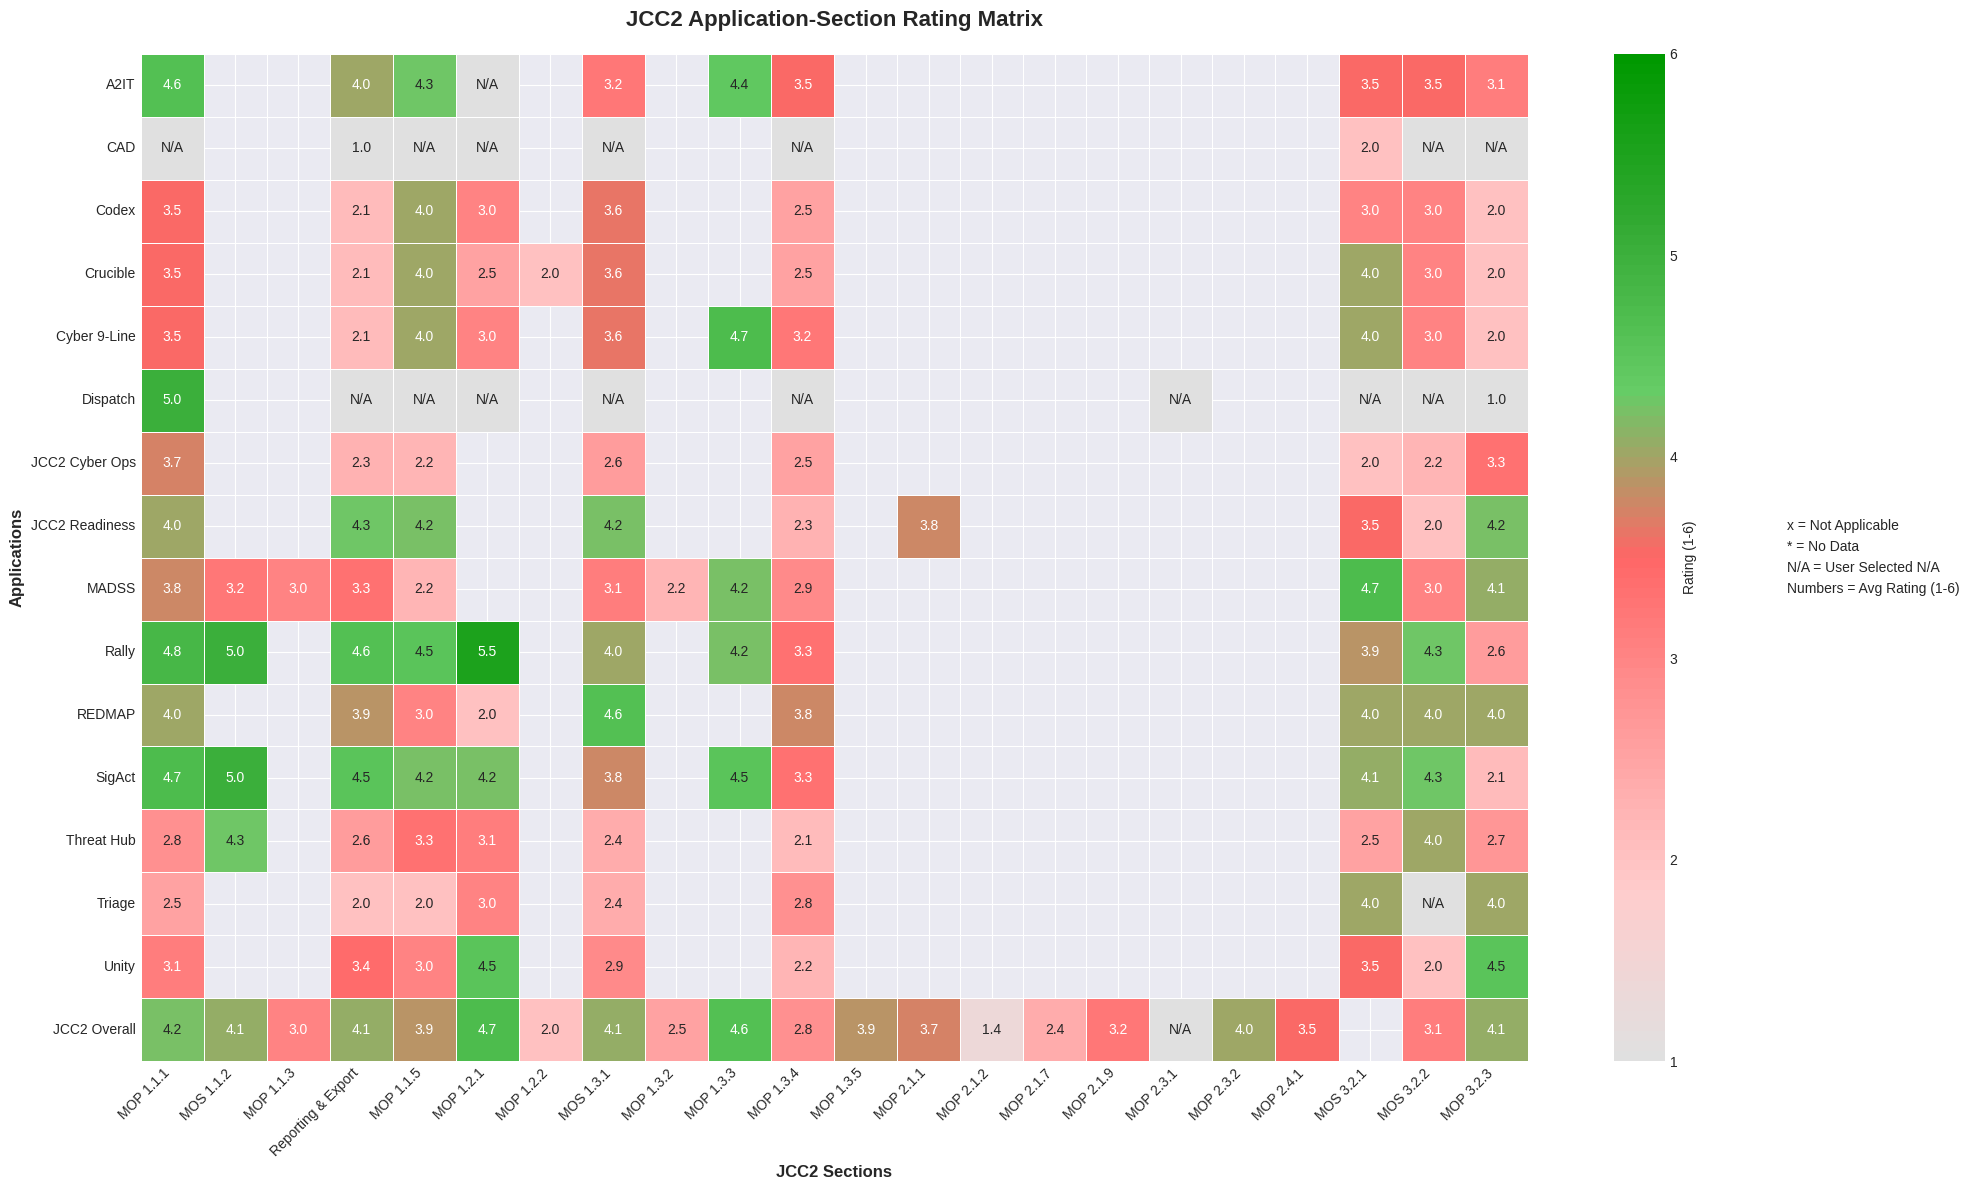

In [29]:
# Create a visual heatmap of the ratings
# Convert matrix to numeric for visualization
numeric_matrix = []
mask_matrix = []

for row in matrix_data:
    numeric_row = []
    mask_row = []
    for val in row:
        if val == 'x':
            numeric_row.append(0)
            mask_row.append(True)
        elif val == '*':
            numeric_row.append(-1)
            mask_row.append(False)
        elif val == 'N/A':
            numeric_row.append(-2)
            mask_row.append(False)
        else:
            try:
                numeric_row.append(float(val))
                mask_row.append(False)
            except:
                numeric_row.append(0)
                mask_row.append(True)
    numeric_matrix.append(numeric_row)
    mask_matrix.append(mask_row)

# Create figure
fig, ax = plt.subplots(figsize=(20, 12))

# Create custom colormap
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.patches as mpatches

# Define colors for different values
colors = ['#e0e0e0', '#ffcccc', '#ff9999', '#ff6666', '#66cc66', '#33aa33', '#009900']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('rating', colors, N=n_bins)

# Create the heatmap
numeric_df = pd.DataFrame(numeric_matrix, index=row_labels, columns=column_labels)
mask_df = pd.DataFrame(mask_matrix, index=row_labels, columns=column_labels)

# Plot heatmap
sns.heatmap(numeric_df, mask=mask_df, annot=matrix_df, fmt='', 
            cmap=cmap, vmin=1, vmax=6, cbar_kws={'label': 'Rating (1-6)'}, 
            linewidths=0.5, ax=ax, annot_kws={'size': 10})

# Customize the plot
ax.set_title('JCC2 Application-Section Rating Matrix', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('JCC2 Sections', fontsize=12, fontweight='bold')
ax.set_ylabel('Applications', fontsize=12, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add legend for special symbols
legend_elements = [
    mpatches.Patch(color='white', label='x = Not Applicable'),
    mpatches.Patch(color='white', label='* = No Data'),
    mpatches.Patch(color='white', label='N/A = User Selected N/A'),
    mpatches.Patch(color='white', label='Numbers = Avg Rating (1-6)')
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

In [30]:
# Generate summary statistics
print("\nSummary Statistics:")
print("=" * 80)

# Application statistics
app_stats = []
for i, app in enumerate(row_labels[:-1]):  # Exclude JCC2 Overall
    row = matrix_data[i]
    ratings = []
    for val in row:
        try:
            rating = float(val)
            ratings.append(rating)
        except:
            pass
    
    if ratings:
        app_stats.append({
            'Application': app,
            'Avg Rating': np.mean(ratings),
            'Min Rating': min(ratings),
            'Max Rating': max(ratings),
            'Sections Rated': len(ratings),
            'Not Applicable': row.count('x'),
            'No Data': row.count('*')
        })

app_stats_df = pd.DataFrame(app_stats)
if not app_stats_df.empty:
    app_stats_df = app_stats_df.sort_values('Avg Rating', ascending=False)
    print("\nApplication Performance Summary:")
    print(app_stats_df.to_string(index=False))

# Section statistics
section_stats = []
for j, section in enumerate(column_labels):
    column_values = [matrix_data[i][j] for i in range(len(matrix_data)-1)]  # Exclude JCC2 Overall
    ratings = []
    for val in column_values:
        try:
            rating = float(val)
            ratings.append(rating)
        except:
            pass
    
    if ratings:
        section_stats.append({
            'Section': section,
            'Avg Rating': np.mean(ratings),
            'Min Rating': min(ratings),
            'Max Rating': max(ratings),
            'Apps Rated': len(ratings),
            'Not Applicable': column_values.count('x'),
            'No Data': column_values.count('*')
        })

section_stats_df = pd.DataFrame(section_stats)
if not section_stats_df.empty:
    section_stats_df = section_stats_df.sort_values('Avg Rating', ascending=False)
    print("\nSection Performance Summary:")
    print(section_stats_df.to_string(index=False))


Summary Statistics:

Application Performance Summary:
   Application  Avg Rating  Min Rating  Max Rating  Sections Rated  Not Applicable  No Data
         Rally    4.245455         2.6         5.5              11              11        0
        SigAct    4.063636         2.1         5.0              11              11        0
          A2IT    3.788889         3.1         4.6               9              12        0
        REDMAP    3.700000         2.0         4.6               9              13        0
JCC2 Readiness    3.611111         2.0         4.3               9              13        0
  Cyber 9-Line    3.310000         2.0         4.7              10              12        0
         MADSS    3.308333         2.2         4.7              12              10        0
         Unity    3.233333         2.0         4.5               9              13        0
      Dispatch    3.000000         1.0         5.0               2              12        0
    Threat Hub    2.98000

In [32]:
# Export results to CSV
output_file = 'jcc2_application_section_matrix.csv'
matrix_df.to_csv(output_file)
print(f"\nMatrix exported to: {output_file}")

# Also create a detailed report
detailed_report = []
for i, app in enumerate(all_applications):
    for j, section in enumerate(target_sections):
        value = matrix_data[i][j]
        detailed_report.append({
            'Application': app_display_names.get(app, app),
            'Section': section_display_names.get(section, section),
            'Rating': value,
            'Status': 'Not Applicable' if value == 'x' else 
                     'No Data' if value == '*' else 
                     'User NA' if value == 'N/A' else 'Rated'
        })

# Add JCC2 Overall
for j, section in enumerate(target_sections):
    value = matrix_data[-1][j]
    detailed_report.append({
        'Application': 'JCC2 Overall',
        'Section': section_display_names.get(section, section),
        'Rating': value,
        'Status': 'Not Applicable' if value == 'x' else 
                 'No Data' if value == '*' else 
                 'User NA' if value == 'N/A' else 'Rated'
    })

detailed_df = pd.DataFrame(detailed_report)
detailed_df.to_csv('jcc2_application_section_detailed.csv', index=False)
print(f"Detailed report exported to: jcc2_application_section_detailed.csv")


Matrix exported to: jcc2_application_section_matrix.csv
Detailed report exported to: jcc2_application_section_detailed.csv


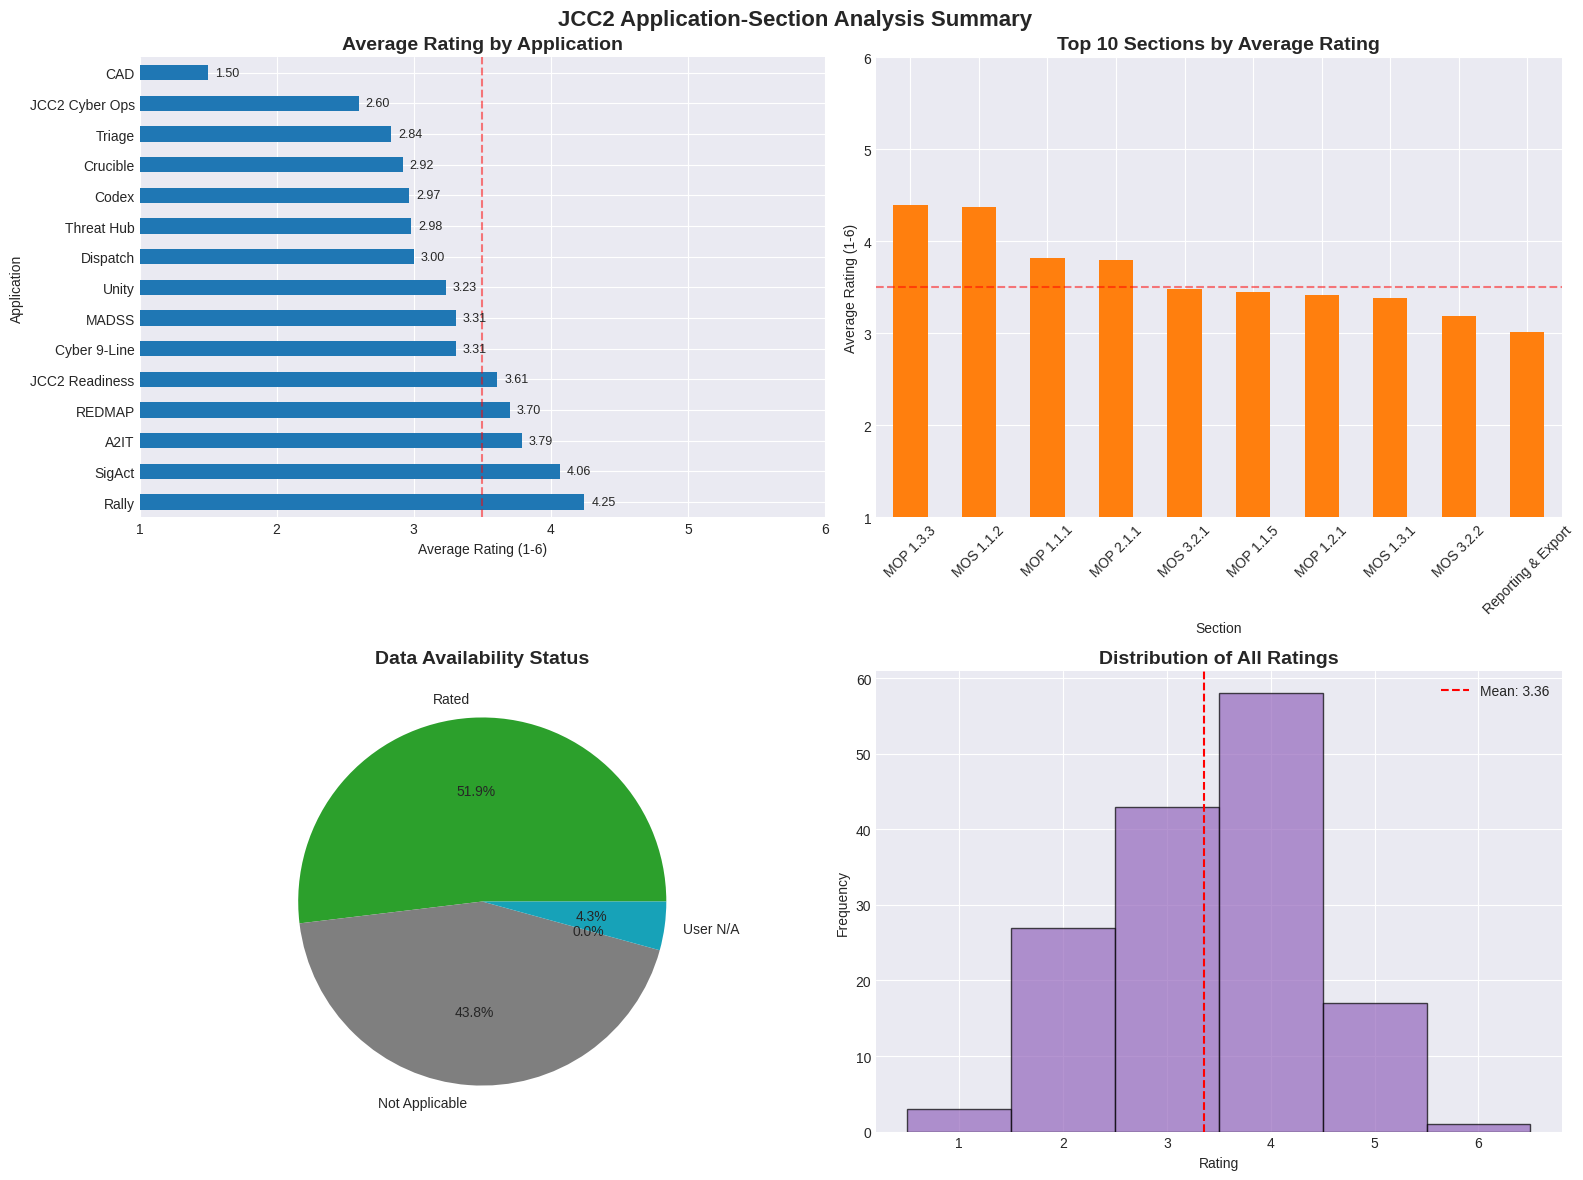

In [33]:
# Create additional visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Application average ratings
if not app_stats_df.empty:
    app_stats_df.plot(x='Application', y='Avg Rating', kind='barh', ax=ax1, 
                     color=COLORS['primary'], legend=False)
    ax1.set_title('Average Rating by Application', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Average Rating (1-6)')
    ax1.set_xlim(1, 6)
    ax1.axvline(3.5, color='red', linestyle='--', alpha=0.5)
    
    # Add value labels
    for i, (idx, row) in enumerate(app_stats_df.iterrows()):
        ax1.text(row['Avg Rating'] + 0.05, i, f"{row['Avg Rating']:.2f}", 
                va='center', fontsize=9)

# 2. Section average ratings
if not section_stats_df.empty:
    section_stats_df.head(10).plot(x='Section', y='Avg Rating', kind='bar', ax=ax2, 
                                  color=COLORS['secondary'], legend=False)
    ax2.set_title('Top 10 Sections by Average Rating', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Average Rating (1-6)')
    ax2.set_ylim(1, 6)
    ax2.axhline(3.5, color='red', linestyle='--', alpha=0.5)
    ax2.tick_params(axis='x', rotation=45)

# 3. Data availability summary
data_status = {
    'Rated': sum(row.count(val) for row in matrix_data for val in row 
                if val not in ['x', '*', 'N/A'] and val != ''),
    'Not Applicable': sum(row.count('x') for row in matrix_data),
    'No Data': sum(row.count('*') for row in matrix_data),
    'User N/A': sum(row.count('N/A') for row in matrix_data)
}

if data_status:
    pd.Series(data_status).plot(kind='pie', ax=ax3, autopct='%1.1f%%', 
                               colors=[COLORS['success'], COLORS['gray'], 
                                      COLORS['warning'], COLORS['info']])
    ax3.set_title('Data Availability Status', fontsize=14, fontweight='bold')
    ax3.set_ylabel('')

# 4. Rating distribution
all_ratings = []
for row in matrix_data:
    for val in row:
        try:
            rating = float(val)
            all_ratings.append(rating)
        except:
            pass

if all_ratings:
    ax4.hist(all_ratings, bins=np.arange(0.5, 7.5, 1), color=COLORS['tertiary'], 
            edgecolor='black', alpha=0.7)
    ax4.set_title('Distribution of All Ratings', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Rating')
    ax4.set_ylabel('Frequency')
    ax4.set_xticks(range(1, 7))
    ax4.axvline(np.mean(all_ratings), color='red', linestyle='--', 
               label=f'Mean: {np.mean(all_ratings):.2f}')
    ax4.legend()

plt.suptitle('JCC2 Application-Section Analysis Summary', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Summary and Conclusions

This notebook has generated a comprehensive matrix showing the relationship between JCC2 applications and evaluation sections. The matrix reveals:

1. **Application Coverage**: Which applications are evaluated in which sections
2. **Rating Performance**: Average effectiveness/suitability ratings on a 1-6 scale
3. **Data Gaps**: Areas where data is missing or applications are not applicable
4. **User Feedback**: Instances where users indicated features were not applicable to their use

The visualizations and exported data can be used for:
- Identifying high and low performing applications
- Understanding which sections have the most comprehensive coverage
- Planning improvements based on user ratings
- Focusing data collection efforts on gaps
